In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [104]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [105]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df['CryoSleep'].fillna(False, inplace=True)
df['VIP'].fillna(False, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'] = df['Age'].astype(int)
df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [106]:
df[['Deck', 'Number', 'Side']] = df['Cabin'].str.split('/', expand=True)
df['Number'].fillna(df['Number'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [107]:
df['Surname'] = df['Name'].str.split().str[-1]
df.drop(columns=['Name'], inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Side,Surname
0,0001_01,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Ofracculy
1,0002_01,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Vines
2,0003_01,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Susent
3,0003_02,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Susent
4,0004_01,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Santantines


In [108]:
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] =df['VIP'].astype(int)
df['Transported'] =df['Transported'].astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Side,Surname
0,0001_01,Europa,0,TRAPPIST-1e,39,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,Ofracculy
1,0002_01,Earth,0,TRAPPIST-1e,24,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,Vines
2,0003_01,Europa,0,TRAPPIST-1e,58,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,Susent
3,0003_02,Europa,0,TRAPPIST-1e,33,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,Susent
4,0004_01,Earth,0,TRAPPIST-1e,16,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,Santantines


In [109]:
df['TotalSpending'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
df['TotalSpending'] = df['TotalSpending'].astype(int)
df.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Number,Side,Surname,TotalSpending
0,0001_01,Europa,0,TRAPPIST-1e,39,0,0,B,0,P,Ofracculy,0
1,0002_01,Earth,0,TRAPPIST-1e,24,0,1,F,0,S,Vines,736
2,0003_01,Europa,0,TRAPPIST-1e,58,1,0,A,0,S,Susent,10383
3,0003_02,Europa,0,TRAPPIST-1e,33,0,0,A,0,S,Susent,5176
4,0004_01,Earth,0,TRAPPIST-1e,16,0,1,F,1,S,Santantines,1091


In [110]:

col_features = ['HomePlanet', 'Destination', 'Deck', 'Side', 'Surname']
for col in col_features:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Number,Side,Surname,TotalSpending
0,0001_01,1,0,2,39,0,0,1,0,0,1431,0
1,0002_01,0,0,2,24,0,1,5,0,1,2109,736
2,0003_01,1,0,2,58,1,0,0,0,1,1990,10383
3,0003_02,1,0,2,33,0,0,0,0,1,1990,5176
4,0004_01,0,0,2,16,0,1,5,1,1,1778,1091


In [111]:
df.to_csv('processed_data.csv')

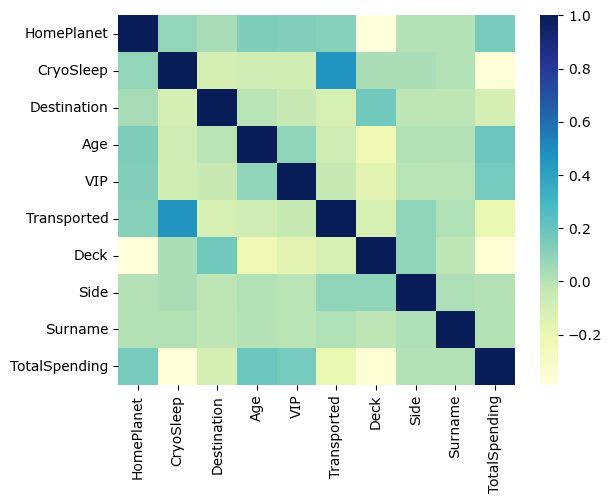

In [112]:
numerical_data = df.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), cmap='YlGnBu')
plt.show()

In [122]:
df = df.drop(columns=["Unnamed: 0", "PassengerId", "Surname"], errors='ignore')
df

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Number,Side,TotalSpending
0,1,0,2,39,0,0,1,0,0,0
1,0,0,2,24,0,1,5,0,1,736
2,1,0,2,58,1,0,0,0,1,10383
3,1,0,2,33,0,0,0,0,1,5176
4,0,0,2,16,0,1,5,1,1,1091
...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41,1,0,0,98,0,8536
8689,0,1,1,18,0,0,6,1499,1,0
8690,0,0,2,26,0,1,6,1500,1,1873
8691,1,0,0,32,0,0,4,608,1,4637


In [123]:
X = df.drop(columns=["Transported"])
y = df["Transported"]


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
import xgboost as xgb

model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=3,  # Prevent overfitting
    gamma=0.2,  # Regularization
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Number: object